In [1]:
import networkx as nx
import numpy as np


In [147]:

g= nx.barabasi_albert_graph(100,2)
n=g.number_of_nodes()
attributes =[ "beta","omega","delta","jug","Infetime","AccpR","SendR","Accp_NegR",'state']
parameters={'omega_min':np.pi/24,
            'omega_max':np.pi*2,
            "delta_min":np.pi/24,
            "jug_min":0.1,
            "delta_max":np.pi/2,
            "jug_max":0.9,
            "beta_max":1.2,
            "beta_min":0.2}
InitParameters(g,parameters)

for atrib in attributes:
     print(g.nodes[0][atrib])




1.1636225002169913
3.159485868536188
0.8106004168462955
0.6571967816440741
0.0
0.0
0.0
0.0
non_infected


In [152]:
l=list(g.neighbors(0))
l

[1, 2, 3, 4, 9, 12, 15, 16, 24, 25, 28, 34, 68, 87]

In [155]:
l=list(g.neighbors(0))
neighbours=list(g.neighbors(0))
                    #Calculating if any nodes of those neighbours can be activated, if yes add them to new_ones.
success = np.random.uniform(0,1,len(neighbours)) < 0.1 #choic alpha nodes
# success == [ True  True  True False  True .... True False False  True False]
new_ones = list(np.extract(success, neighbours))
new_ones

[87]

In [149]:
g.neighbors(0)

TypeError: 'dict_keyiterator' object is not subscriptable

In [76]:
def getRandomValues(n,min,max):
    return (np.random.rand(n)*(max - min)) + min
def InitParameters(g,parameters):
    n=g.number_of_nodes()

    # Set omega
    
    values = dict( enumerate(getRandomValues(n,parameters['omega_min'],parameters['omega_max'])) )
    nx.set_node_attributes(g, values, 'omega')
    # Set beta
    values = dict( enumerate(getRandomValues(n,parameters['beta_min'],parameters['beta_max'])) )
    nx.set_node_attributes(g, values, 'beta')
    # Set delta
    values = dict( enumerate(getRandomValues(n,parameters['delta_min'],parameters['delta_max'])) )
    nx.set_node_attributes(g, values, 'delta')

    # Set jug
    values = dict( enumerate(getRandomValues(n,parameters['jug_min'],parameters['jug_max'])) )
    nx.set_node_attributes(g, values, 'jug')

    # Set other Attributes
    attributes =[ "Infetime","AccpR","SendR","Accp_NegR"]
    zeros = dict( enumerate(np.zeros(n)) )
    for atrrib in attributes:
        nx.set_node_attributes(g, zeros, atrrib)

    nx.set_node_attributes(g, 'non_infected', "state")





In [49]:
g.nodes[4]['beta']

-1.1558003365726555

In [81]:
for u in g.nodes[0]:
    print (u, g.nodes[0][u])

omega 5.640547876300778
beta 0.26934357378138246
delta 1.4411781200324525
jug 0.8375771617600689
Infetime 0.0
AccpR 0.0
SendR 0.0
Accp_NegR 0.0
state non_infected


In [63]:
np.random.rand()*min

-0.08575023899374185

In [83]:
l=['S','D']



NetworkXError: NodeView does not support slicing, try list(G.nodes)[None:None:None]

In [99]:
l= ['a','b']
import random 
random.choices(l,k=8)


['a', 'a', 'b', 'a', 'a', 'b', 'b', 'b']

In [86]:
array= np.zeros(100)
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
beta =list(g.nodes(data="beta"))
beta[:]


[(0, 0.26934357378138246),
 (1, 0.857721875777008),
 (2, 0.48092267996507493),
 (3, 0.37166382464909103),
 (4, 0.7838387304824015)]

In [121]:
my_list = ['a', 'b', 'c', 'd','g','u','t']

for i in range(5):
    print('********')
    for index, item in reversed(list(enumerate(my_list))):
        print(index,item)
        if index==1:
            my_list.pop(item)

********
6 t
5 u
4 g
3 d
2 c
1 b


TypeError: 'str' object cannot be interpreted as an integer

In [139]:
np.random.rand()

0.3833576687975391

In [142]:
success = np.random.uniform(0,1,8) < 0.3

success

array([False, False, False,  True, False,  True,  True, False])

In [13]:
import pandas as pd
def f(l,l2,df):
    df =pd.DataFrame(data={'l':l,'l2':l2})
    

In [14]:
df=0
f([1,2,3],[5,6,9],df)
df


0

In [8]:
import multiprocessing
import time
from multiprocessing import Manager

with Manager() as manager:
    Stat_Global=manager.list() 

    start_time = time.time()  
    processes=[multiprocessing.Process(target=f,args=([1,2,3],[5,6,9]))for i in range(5)] 
    
    [process.start() for process in processes] 
    [process.join() for process in processes]
    end_time = time.time() 
    print("Parallel xx time=", end_time - start_time)
    print(Stat_Global)
    for each in Stat_Global:
        print(each)

Parallel xx time= 0.1963489055633545
[]


In [19]:
def f(i):
    print(i)
from math import modf
from joblib import Parallel, delayed
r = Parallel(n_jobs=10)(delayed(f)(i) for i in range(10))
r

[None, None, None, None, None, None, None, None, None, None]

In [1]:
import pandas as pd 
l=[1,2,3]
df= pd.DataFrame()

In [4]:
import numpy as np
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [29]:
df.loc[df.shape[0]]=[1,2,3,2]
df

,n1,n2,n3,sim
0,1,2,3,1
1,1,2,3,2


In [5]:
import networkx as nx

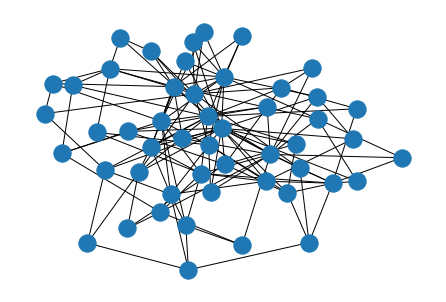

In [7]:
g = nx.barabasi_albert_graph(50, 3)
nx.draw(g)

In [9]:
nx.betweenness_centrality(g)

{0: 0.01485814237727503,
 1: 0.05363750242576773,
 2: 0.041469255659306675,
 3: 0.04659095628483385,
 4: 0.09879529602106132,
 5: 0.07911991282526999,
 6: 0.27537113892343484,
 7: 0.06518144081919591,
 8: 0.12642643755526406,
 9: 0.04644689682954989,
 10: 0.005199910397614478,
 11: 0.015047582330745598,
 12: 0.028718937902611374,
 13: 0.04887561536158473,
 14: 0.022040945637884415,
 15: 0.004838312905914946,
 16: 0.0027261499838030453,
 17: 0.08017095220539096,
 18: 0.0306729752201691,
 19: 0.020533352229780796,
 20: 0.0023748785228377067,
 21: 0.025299487927038948,
 22: 0.015971287782512274,
 23: 0.015590642822785678,
 24: 0.013248153490500425,
 25: 0.014644851794086486,
 26: 0.0007855829922156452,
 27: 0.011177196763931457,
 28: 0.016843757149879596,
 29: 0.03202332319041502,
 30: 0.009364487553263063,
 31: 0.0042090243939733735,
 32: 0.00590803872053872,
 33: 0.003696648211954334,
 34: 0.0030126336248785224,
 35: 0.004721023024594454,
 36: 0.008265573476032658,
 37: 0.00042517006802